In [28]:
import librosa
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
path = './data/zeinab/HC_AH/*.wav'
audio_paths = glob.glob(path)

## The two coming cells get the min, max and avg length of recordings in zeinab/HC_AH and PD_AH

In [ ]:
durations = []
# loop through audio files and append file duration to list
for path in audio_paths:
    try:
        duration = librosa.get_duration(path=path)
        durations.append(duration)
        
    except Exception as e:
        print(f"error processings {path}: {e}")


In [ ]:
# Get minimum, maximuum and average duration in HC_AH (Healthy sounds)
if durations:
    minimum = np.min(durations)
    maximum = np.max(durations)
    average = np.mean(durations)

    print(f"length of shortest recording: {minimum}")
    print(f"length of longest recording: {maximum}")
    print(f"average length of recordings: {average}")
else:
    print(f"no files were processed")

length of shortest recording: 1.62525
length of longest recording: 5.763625
average length of recordings: 3.0650274390243903


In [33]:
path = './data/zeinab/PD_AH/*.wav'
audio_paths = glob.glob(path)

In [34]:
durations = []
# loop through audio files and append file duration to list
for path in audio_paths:
    try:
        duration = librosa.get_duration(path=path)
        durations.append(duration)
        
    except Exception as e:
        print(f"error processings {path}: {e}")

In [ ]:
# Get minimum, maximuum and average duration PD_AH (Parkinson sounds)
if durations:
    minimum = np.min(durations)
    maximum = np.max(durations)
    average = np.mean(durations)

    print(f"length of shortest recording: {minimum}")
    print(f"length of longest recording: {maximum}")
    print(f"average length of recordings: {average}")
else:
    print(f"no files were processed")

length of shortest recording: 1.516125
length of longest recording: 7.208
average length of recordings: 3.5896249999999994


## The coming cells examine the xlsx file

In [23]:
meta_data = pd.read_excel('data/zeinab/Demographics_age_sex.xlsx')
meta_data.head(10)

,Sample ID,Label,Age,Sex
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,HC,69.0,M
1,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,HC,43.0,M
2,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,HC,18.0,F
3,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D,HC,28.0,M
4,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22,HC,68.0,M
5,AH_197T_7552379A-2310-46E1-9466-9D8045C990B8,HC,24.0,M
6,AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D,HC,78.0,M
7,AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3,HC,72.0,F
8,AH_292J_201CB911-31C1-4CD0-BD73-4FBA4A16C21F,HC,57.0,F
9,AH_322A_C3BF5535-A11E-498E-94EB-BE7E74099FFB,HC,44.0,M


In [ ]:
# Descriptives of the Age column
print("Age data:")
print(meta_data['Age'].describe())

Age data:
count    81.000000
mean     57.264198
std      15.371786
min      18.000000
25%      44.000000
50%      58.140000
75%      69.450000
max      85.310000
Name: Age, dtype: float64


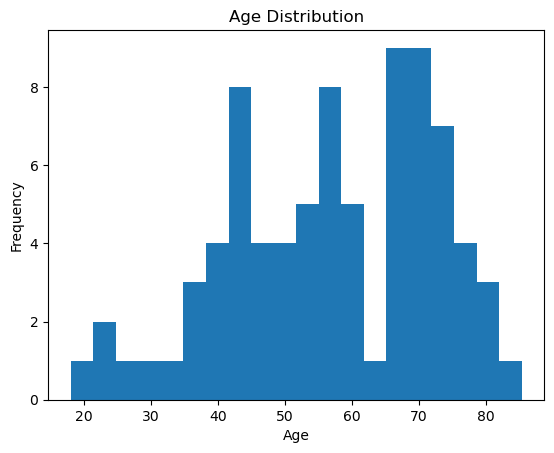

In [ ]:
# Age distribution
meta_data['Age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.show()

In [ ]:
# Count of Healthy vs Parkinson labels/classes (Target)
class_distribution= meta_data['Label'].value_counts().sort_values(ascending=False)
print(class_distribution)

Label
HC      41
PwPD    40
Name: count, dtype: int64


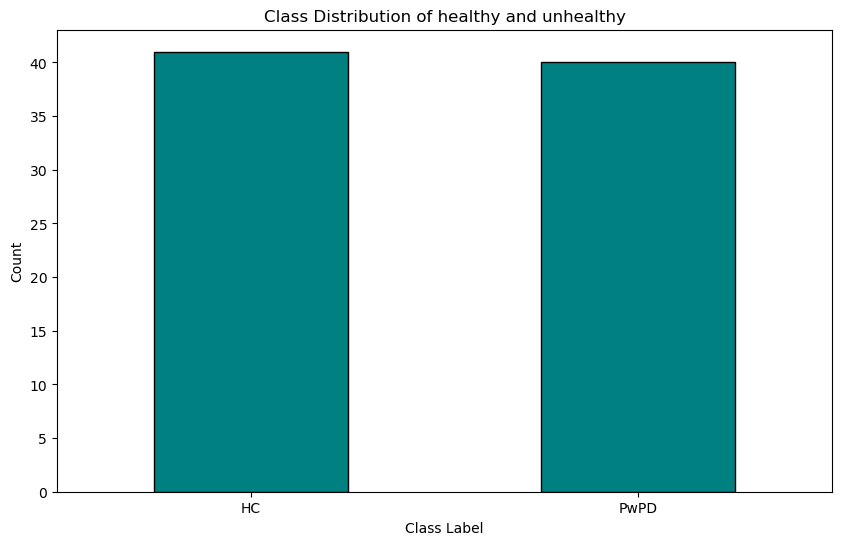

In [ ]:
# Target distribution
plt.figure(figsize=(10,6))
class_distribution.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Class Distribution of healthy and unhealthy")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Distribution of gender
gender_distribution = meta_data['Sex'].value_counts().sort_values(ascending=False)
print(gender_distribution)

Sex
F    44
M    37
Name: count, dtype: int64


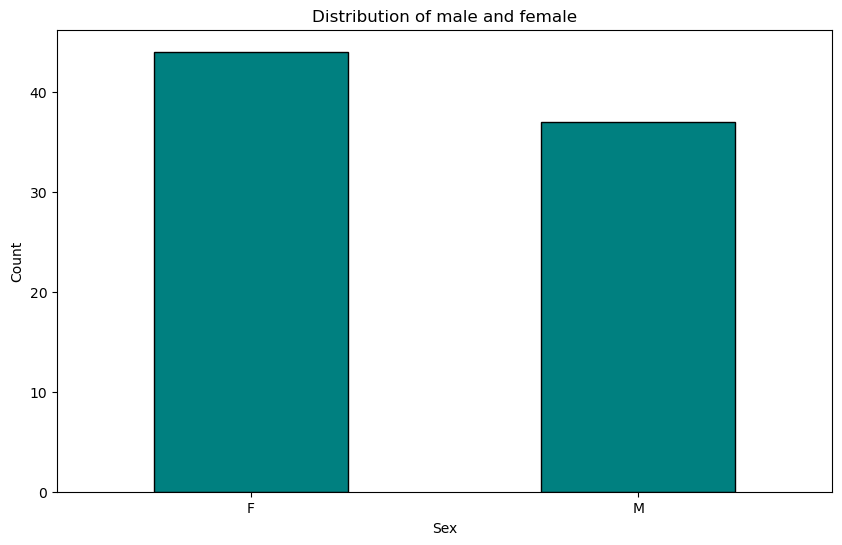

In [43]:
plt.figure(figsize=(10,6))
gender_distribution.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Distribution of male and female")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


<Figure size 1000x600 with 0 Axes>

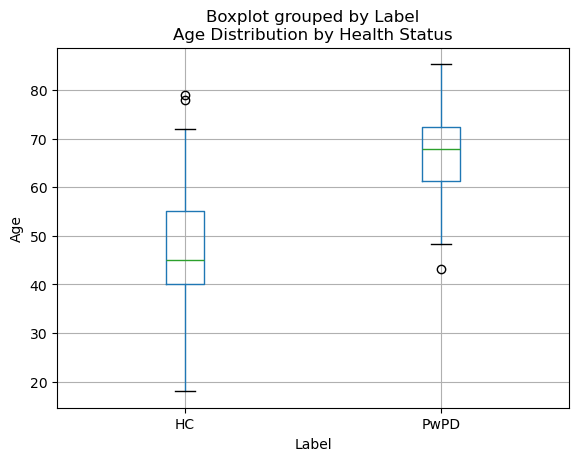

In [54]:
plt.figure(figsize=(10, 6))
meta_data.boxplot(column='Age', by='Label')
plt.title('Age Distribution by Health Status')
plt.xlabel('Label')
plt.ylabel('Age')
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
meta_data_encoded = meta_data.copy()
meta_data_encoded['Label_numeric'] = le.fit_transform(meta_data['Label'])
correlation = meta_data_encoded['Age'].corr(meta_data_encoded['Label_numeric'])
print(f"Correlation between age and health status: {correlation:.3f}")

Correlation between age and health status: 0.632


## Dataset Overview:
  - 81 total samples with demographics data
  - Labels: "HC" (Healthy Controls, 41 samples) and "PwPD" (People with Parkinson's Disease, 40 samples)
  - Age range: 18-85.3 years (mean: 57.3 years)
  - Gender: 44 females, 37 males

  Audio Data:
  - Healthy Controls (HC_AH): recordings 1.6-5.8 seconds (avg: 3.1s)
  - Parkinson's patients (PD_AH): recordings 1.5-7.2 seconds (avg: 3.6s)

  Key Finding:
  The correlation between age and health status is 0.632 - a moderately strong positive correlation, indicating that older individuals are more likely to
  have Parkinson's disease in this dataset.

  The boxplot visualization shows that Parkinson's patients tend to be older than healthy controls, which aligns with the known epidemiology of Parkinson's
  disease being more common in older adults.